In [1]:
import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

2023-02-11 18:04:26.574264: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/x1/3fzzpt8s0wb1z5zdd_z53mxr0000gn/T/ipykernel_74708/1559922479.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# Create random data between (-10, 10) and determine groundtruth
# Ground Truth Cos Function - y = cos(x)
# Ground Truth Sin Function - y = arcsinh(x)
simIn = 20 * torch.rand((2000, 1)) - 10
groundCos = np.cos(simIn)
groundSin = np.arcsinh(simIn)

In [3]:
# Neural Network Definitions
# Shallow NN for simulation - 1 Hidden layer / 751 Parameters
class ShallowNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 250)
        self.fc2 = nn.Linear(250, 1)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val

# Middle NN for simulation - 3 Hidden layer / 755 Parameters
class MiddleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 9)
        self.fc4 = nn.Linear(9, 1)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = self.fc4(val)
        return val    
# Deep NN for simulation -  5 Hidden Layers / 747 Parameters
class DeepNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 24)
        self.fc2 = nn.Linear(24, 16)
        self.fc3 = nn.Linear(16, 10)
        self.fc4 = nn.Linear(10, 8)        
        self.fc5 = nn.Linear(8, 4)
        self.fc6 = nn.Linear(4, 1)        
        
    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = F.relu(self.fc4(val))
        val = F.relu(self.fc5(val))
        val = self.fc6(val)
        return val

In [4]:
# Set up necessary auxilaries for neural net training for simulation of both functions
NNCosShallow = ShallowNN()
NNCosMiddle = MiddleNN()
NNCosDeep = DeepNN()
NNSinShallow = ShallowNN()
NNSinMiddle = MiddleNN()
NNSinDeep = DeepNN()
costFun = nn.MSELoss()
OptCosShallow = optim.Adam(NNCosShallow.parameters(), lr=0.001)
OptCosMiddle = optim.Adam(NNCosMiddle.parameters(), lr=0.001)
OptCosDeep = optim.Adam(NNCosDeep.parameters(), lr=0.001)
OptSinShallow = optim.Adam(NNSinShallow.parameters(), lr=0.001)
OptSinMiddle = optim.Adam(NNSinMiddle.parameters(), lr=0.001)
OptSinDeep = optim.Adam(NNSinDeep.parameters(), lr=0.001)

In [5]:
# Train neural networks and track progression on function cos(x)
EPOCHS = 1000
c = 0
cList = []
shallowCosList = []
for index in range(EPOCHS):
    cList.append(c)
    c += 1
    NNCosShallow.zero_grad()
    output = NNCosShallow(simIn)
    cost = costFun(output, groundCos)
    with torch.no_grad():
        c1 = costFun(output, groundCos)
    shallowCosList.append(c1)
    cost.backward()
    OptCosShallow.step()

middleCosList = []
for index in range(EPOCHS):
    NNCosMiddle.zero_grad()
    output = NNCosMiddle(simIn)
    cost = costFun(output, groundCos)
    with torch.no_grad():
        c1 = costFun(output, groundCos)
    middleCosList.append(c1)
    cost.backward()
    OptCosMiddle.step()    
    
deepCosList = []
for index in range(EPOCHS):
    NNCosDeep.zero_grad()
    output = NNCosDeep(simIn)
    cost = costFun(output, groundCos)
    with torch.no_grad():
        c1 = costFun(output, groundCos)
    deepCosList.append(c1)
    cost.backward()
    OptCosDeep.step()

In [6]:
# Train neural networks and track progression on function arcsinh(x)
shallowSinList = []
for index in range(EPOCHS):
    NNSinShallow.zero_grad()
    output = NNSinShallow(simIn)
    cost = costFun(output, groundSin)
    with torch.no_grad():
        c1 = costFun(output, groundSin)
    shallowSinList.append(c1)
    cost.backward()
    OptSinShallow.step()

middleSinList = []
for index in range(EPOCHS):
    NNSinMiddle.zero_grad()
    output = NNSinMiddle(simIn)
    cost = costFun(output, groundSin)
    with torch.no_grad():
        c1 = costFun(output, groundSin)
    middleSinList.append(c1)
    cost.backward()
    OptSinMiddle.step()    
    
deepSinList = []
for index in range(EPOCHS):
    NNSinDeep.zero_grad()
    output = NNSinDeep(simIn)
    cost = costFun(output, groundSin)
    with torch.no_grad():
        c1 = costFun(output, groundSin)
    deepSinList.append(c1)
    cost.backward()
    OptSinDeep.step()

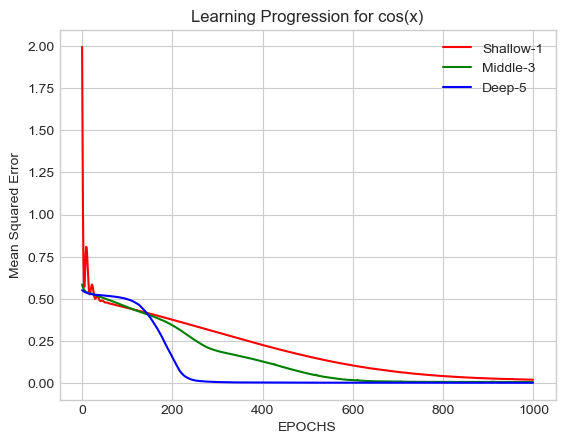

In [7]:
# Visulaize Training process of cos function
plt.plot(cList, shallowCosList, 'r', label='Shallow-1')
plt.plot(cList, middleCosList, 'g', label='Middle-3')
plt.plot(cList, deepCosList, 'b', label='Deep-5')
plt.title("Learning Progression for cos(x)")
plt.xlabel("EPOCHS")
plt.ylabel("Mean Squared Error")
plt.legend(loc="upper right")
plt.show()

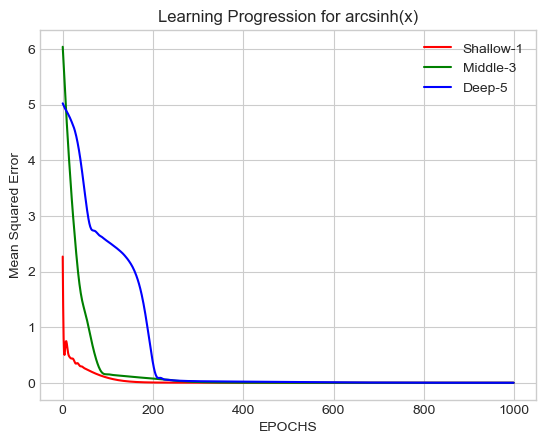

In [8]:
# Visulaize Training process of arcsinh(x) function
plt.plot(cList, shallowSinList, 'r', label='Shallow-1')
plt.plot(cList, middleSinList, 'g', label='Middle-3')
plt.plot(cList, deepSinList, 'b', label='Deep-5')
plt.title("Learning Progression for arcsinh(x)")
plt.xlabel("EPOCHS")
plt.ylabel("Mean Squared Error")
plt.legend(loc="upper right")
plt.show()

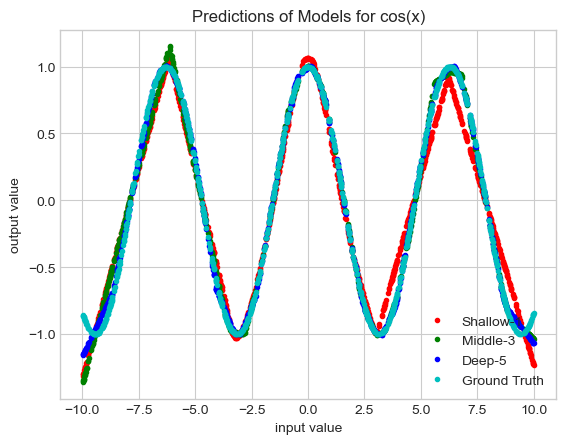

In [9]:
# Visulaize how well the neural nets do with unseen data
simIn = 20 * torch.rand((1000, 1)) - 10
groundCos = np.cos(simIn)
groundSin = np.arcsinh(simIn)

# run output through nns and get predictions
shallowCosOutput = NNCosShallow(simIn)
middleCosOutput = NNCosMiddle(simIn)
deepCosOutput = NNCosDeep(simIn)
shallowSinOutput = NNSinShallow(simIn)
middleSinOutput = NNSinMiddle(simIn)
deepSinOutput = NNSinDeep(simIn)

# plot predictions for cos(x) and compate to ground truth
plt.plot(simIn, shallowCosOutput.tolist(), 'r.', label='Shallow-1')
plt.plot(simIn, middleCosOutput.tolist(), 'g.', label='Middle-3')
plt.plot(simIn, deepCosOutput.tolist(), 'b.', label='Deep-5')
plt.plot(simIn, groundCos.tolist(), 'c.', label='Ground Truth')
plt.title("Predictions of Models for cos(x)")
plt.xlabel("input value")
plt.ylabel("output value")
plt.legend(loc="lower right")
plt.show()

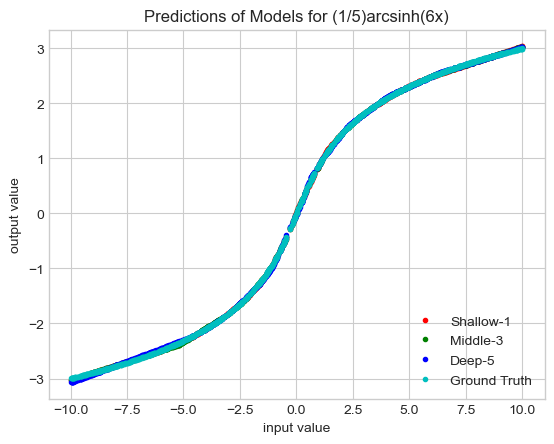

In [10]:
# plot predictions for arcsinh(x) and compate to ground truth
plt.plot(simIn, shallowSinOutput.tolist(), 'r.', label='Shallow-1')
plt.plot(simIn, middleSinOutput.tolist(), 'g.', label='Middle-3')
plt.plot(simIn, deepSinOutput.tolist(), 'b.', label='Deep-5')
plt.plot(simIn, groundSin.tolist(), 'c.', label='Ground Truth')
plt.title("Predictions of Models for (1/5)arcsinh(6x)")
plt.xlabel("input value")
plt.ylabel("output value")
plt.legend(loc="lower right")
plt.show()